##### Universidade Federal de São Carlos - UFSCar <br>Centro de Ciências Exatas e Tecnólogicas - CCET

# Trabalho de Graduação
### Uma abordagem estatística sobre a estimação de _redshifts_ de quasares usando dados do S-PLUS
#### Análise descritiva dos novos dados

Discente: Gabriela Pereira Soares<br>Orientador: Rafael Izbicki<br>Co-orientadora: Lilianne Nakazono

Outubro de 2022

In [1]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import math as math
import scipy.stats
from collections import OrderedDict

In [2]:
caminho = "C:/Users/Gabriela/Documents/TG/Códigos TG2/PStotal_data/"

# Carregando os dados de treinamento
trainfold0 = pd.read_csv(caminho+"train0.csv", low_memory=False)
trainfold1 = pd.read_csv(caminho+"train1.csv", low_memory=False)
trainfold2 = pd.read_csv(caminho+"train2.csv", low_memory=False)
trainfold3 = pd.read_csv(caminho+"train3.csv", low_memory=False)
trainfold4 = pd.read_csv(caminho+"train4.csv", low_memory=False)

# Carregando os dados de validação
validationfold0 = pd.read_csv(caminho+"validation0.csv", low_memory=False)
validationfold1 = pd.read_csv(caminho+"validation1.csv", low_memory=False)
validationfold2 = pd.read_csv(caminho+"validation2.csv", low_memory=False)
validationfold3 = pd.read_csv(caminho+"validation3.csv", low_memory=False)
validationfold4 = pd.read_csv(caminho+"validation4.csv", low_memory=False)

# Carregando a amostra de teste
test = pd.read_csv(caminho+"test.csv", low_memory=False)

In [3]:
# 560 variáveis iniciais
trainfold0.shape

(19612, 560)

In [4]:
aper = "PStotal" # abertura PStotal
specz = "Z" # espectro Z

feat_broad = ['u', 'g', 'r', 'i', 'z'] # banda larga
feat_narrow = ['J0378', 'J0395', 'J0410', 'J0430', 'J0515', 'J0660', 'J0861'] # banda estreita

feat = feat_broad+feat_narrow
splus = [item+"_"+aper for item in feat]

# Magnitudes
wise = ["W1_MAG", "W2_MAG"]
galex = ['FUVmag', 'NUVmag']

# Erros
error_splus = ["e_"+item for item in splus]
error_wise = [item+"_ERR" for item in wise]
error_galex = ["e_"+item for item in galex]

# Colunas
cols = ['index','RA_1','DEC_1']+splus+wise+galex+error_splus+error_wise+error_galex+['Z']

In [5]:
# Filtrando as colunas que serão utilizada inicialmente
trainf0 = trainfold0[cols]
trainf1 = trainfold1[cols]
trainf2 = trainfold2[cols]
trainf3 = trainfold3[cols]
trainf4 = trainfold4[cols]

validf0 = validationfold0[cols]
validf1 = validationfold1[cols]
validf2 = validationfold2[cols]
validf3 = validationfold3[cols]
validf4 = validationfold4[cols]

teste = test[cols]

In [6]:
rede_neural = pd.read_csv('colors-BN-PStotal.csv') # dados da rede neural

In [7]:
# Os valores missing das bandas do S-PLUS foram substituidos por 99
teste[teste['r_PStotal'] != rede_neural['r_PStotal']][['RA_1','DEC_1','r_PStotal','e_r_PStotal']]

,RA_1,DEC_1,r_PStotal,e_r_PStotal
850,323.057480,0.132673,99.0,22.137370
3433,350.797071,0.097865,99.0,22.324270
4622,317.786031,0.628569,99.0,22.640488
4928,356.834168,0.594926,99.0,22.381844
5559,15.477938,0.042358,99.0,22.584015
6273,31.781495,-0.543196,99.0,22.552084
7041,335.897216,1.000497,99.0,22.039093


In [8]:
# Na rede neural, os valores missing foram substituidos pelo erro de magnitude
rede_neural[teste['r_PStotal'] != rede_neural['r_PStotal']][['RA','DEC','r_PStotal']]

,RA,DEC,r_PStotal
850,323.057480,0.132673,22.137370
3433,350.797071,0.097865,22.324270
4622,317.786031,0.628569,22.640488
4928,356.834168,0.594926,22.381844
5559,15.477938,0.042358,22.584015
6273,31.781495,-0.543196,22.552084
7041,335.897216,1.000497,22.039093


In [9]:
# Os valores missing nas bandas S-PLUS já vieram inputados pelo valor 99
teste.isnull().any(axis=0)

index              False
RA_1               False
DEC_1              False
u_PStotal          False
g_PStotal          False
r_PStotal          False
i_PStotal          False
z_PStotal          False
J0378_PStotal      False
J0395_PStotal      False
J0410_PStotal      False
J0430_PStotal      False
J0515_PStotal      False
J0660_PStotal      False
J0861_PStotal      False
W1_MAG              True
W2_MAG              True
FUVmag              True
NUVmag              True
e_u_PStotal        False
e_g_PStotal        False
e_r_PStotal        False
e_i_PStotal        False
e_z_PStotal        False
e_J0378_PStotal    False
e_J0395_PStotal    False
e_J0410_PStotal    False
e_J0430_PStotal    False
e_J0515_PStotal    False
e_J0660_PStotal    False
e_J0861_PStotal    False
W1_MAG_ERR          True
W2_MAG_ERR          True
e_FUVmag            True
e_NUVmag            True
Z                  False
dtype: bool

In [10]:
(teste==99).any(axis=0)

index              False
RA_1               False
DEC_1              False
u_PStotal           True
g_PStotal           True
r_PStotal           True
i_PStotal           True
z_PStotal           True
J0378_PStotal       True
J0395_PStotal       True
J0410_PStotal       True
J0430_PStotal       True
J0515_PStotal       True
J0660_PStotal       True
J0861_PStotal       True
W1_MAG             False
W2_MAG             False
FUVmag             False
NUVmag             False
e_u_PStotal        False
e_g_PStotal        False
e_r_PStotal        False
e_i_PStotal        False
e_z_PStotal        False
e_J0378_PStotal    False
e_J0395_PStotal    False
e_J0410_PStotal    False
e_J0430_PStotal    False
e_J0515_PStotal    False
e_J0660_PStotal    False
e_J0861_PStotal    False
W1_MAG_ERR         False
W2_MAG_ERR         False
e_FUVmag           False
e_NUVmag           False
Z                  False
dtype: bool

In [11]:
%%capture --no-display

# Imputando os valores NaN pelo valor 99 (neste caso serão só as bandas do WISE e GALEX)
trainf0.fillna(99, inplace = True)
trainf1.fillna(99, inplace = True)
trainf2.fillna(99, inplace = True)
trainf3.fillna(99, inplace = True)
trainf4.fillna(99, inplace = True)

validf0.fillna(99, inplace = True)
validf1.fillna(99, inplace = True)
validf2.fillna(99, inplace = True)
validf3.fillna(99, inplace = True)
validf4.fillna(99, inplace = True)

teste.fillna(99, inplace = True)

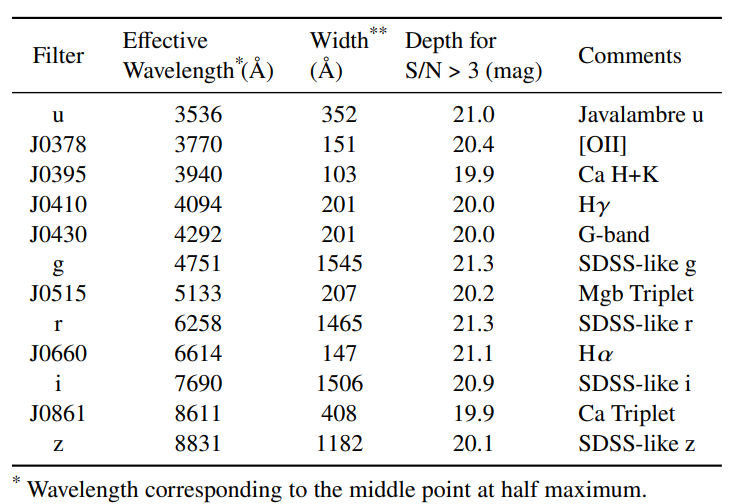

In [12]:
from IPython.display import Image
Image('wavelength_splus.png', width = 400, height = 200)

In [13]:
# Comprimentos de onda efetivos de cada banda
features=OrderedDict()
features = {"wise": None,
            "splus": {"broad": None, "narrow": None},
            "galex": None}

features["wise"] = {"W1_MAG": 34000, "W2_MAG": 46000}

features["galex"] = {'FUVmag': 1528, 'NUVmag': 2310}

features["splus"]["broad"] =  {'u': 3536, 'g': 4751, 'r': 6258, 'i': 7690, 'z': 8831}

features["splus"]["narrow"] = {'J0378': 3770, 'J0395': 3940, 'J0410': 4094, 'J0430': 4292, 
                               'J0515': 5133, 'J0660': 6614, 'J0861': 8611}

features["splus"]["broad"] = {k+"_"+aper:v for k,v in features["splus"]["broad"].items()}
features["splus"]["narrow"] = {k+"_"+aper:v for k,v in features["splus"]["narrow"].items()}

In [14]:
# Define as cores
def create_colors(broad, narrow, wise, galex):
    colors = []
    ref_key = "r"+"_"+aper # aqui ele faz (mag - R) ou (R - mag), ou seja, (banda mais azul) - (banda mais vermelha)
    ref = 6258
    
    list_features = []

    if broad == True:
        list_features = list_features+list(features["splus"]["broad"])
    
    if narrow == True:
        list_features = list_features+list(features["splus"]["narrow"])
    
    if wise == True:
        list_features = list_features+list(features["wise"])

    if galex == True:
        list_features = list_features+list(features["galex"])

    # list_features = list(features["splus"]["broad"])+list(features["splus"]["narrow"])+ \
    #                 list(features["galex"])+ list(features["wise"])
    try:
        list_features.remove(ref_key)
    except:
        pass

    for key in list_features:
        try:
            if features["splus"]["broad"][key] < ref:
                colors.append(key + "-"+ ref_key)
            else:
                colors.append(ref_key + "-" + key)
        except:
            None
        try:
            if features["splus"]["narrow"][key] < ref:
                colors.append(key + "-"+ ref_key)
            else:
                colors.append(ref_key + "-" + key)
        except:
            None
        try:
            if features["wise"][key] < ref:
                colors.append(key + "-"+ ref_key)
            else:
                colors.append(ref_key + "-" + key)
        except:
            None
        try:
            if features["galex"][key] < ref:
                colors.append(key + "-"+ ref_key)
            else:
                colors.append(ref_key + "-" + key)
        except:
            None

    return colors

In [15]:
# Calcula as cores
def calculate_colors(data, broad, narrow, wise, galex):
    colors = create_colors(broad=broad, narrow=narrow, wise=wise, galex=galex)
    for c in colors:
        aux = c.split("-")
        data[c] = data[aux[0]] - data[aux[1]]
    return data

In [16]:
%%capture --no-display
calculate_colors(data=trainf0, broad=True, narrow=True, wise=True, galex=True)
calculate_colors(data=trainf1, broad=True, narrow=True, wise=True, galex=True)
calculate_colors(data=trainf2, broad=True, narrow=True, wise=True, galex=True)
calculate_colors(data=trainf3, broad=True, narrow=True, wise=True, galex=True)
calculate_colors(data=trainf4, broad=True, narrow=True, wise=True, galex=True)

calculate_colors(data=validf0, broad=True, narrow=True, wise=True, galex=True)
calculate_colors(data=validf1, broad=True, narrow=True, wise=True, galex=True)
calculate_colors(data=validf2, broad=True, narrow=True, wise=True, galex=True)
calculate_colors(data=validf3, broad=True, narrow=True, wise=True, galex=True)
calculate_colors(data=validf4, broad=True, narrow=True, wise=True, galex=True)

teste=calculate_colors(data=teste, broad=True, narrow=True, wise=True, galex=True)

In [17]:
# Salvando os dados
trainf0.to_csv('trainf0.csv', index=False)
trainf1.to_csv('trainf1.csv', index=False)
trainf2.to_csv('trainf2.csv', index=False)
trainf3.to_csv('trainf3.csv', index=False)
trainf4.to_csv('trainf4.csv', index=False)

validf0.to_csv('validf0.csv', index=False)
validf1.to_csv('validf1.csv', index=False)
validf2.to_csv('validf2.csv', index=False)
validf3.to_csv('validf3.csv', index=False)
validf4.to_csv('validf4.csv', index=False)

teste.to_csv('teste.csv', index=False)

In [18]:
# Concatenando os datasets para obter o conjunto completo
dados = pd.concat([trainf0,validf0,teste])

In [19]:
dados.iloc[:5,36:]

,u_PStotal-r_PStotal,g_PStotal-r_PStotal,r_PStotal-i_PStotal,r_PStotal-z_PStotal,J0378_PStotal-r_PStotal,J0395_PStotal-r_PStotal,J0410_PStotal-r_PStotal,J0430_PStotal-r_PStotal,J0515_PStotal-r_PStotal,r_PStotal-J0660_PStotal,r_PStotal-J0861_PStotal,r_PStotal-W1_MAG,r_PStotal-W2_MAG,FUVmag-r_PStotal,NUVmag-r_PStotal
0,0.203394,0.103094,0.186249,0.173603,0.415833,-0.289850,-0.107294,0.006773,0.464346,-0.121082,0.029955,3.040628,4.439185,78.922270,78.922270
1,0.339186,0.092838,0.288933,0.133236,-0.223126,0.016081,0.083286,-0.255482,0.120048,0.083111,0.213511,3.080242,4.692867,2.075288,1.384688
2,-0.286549,-0.006939,0.036759,0.243006,0.866768,0.723049,0.262838,0.072387,-0.092099,-0.087261,0.353218,3.955389,3.352796,78.242664,78.242664
3,0.880171,0.143425,-0.007464,-0.120401,0.271906,0.632902,0.935137,-0.029066,0.894842,0.058527,-1.374882,2.869238,4.238882,78.413107,78.413107
4,77.268257,0.521984,-0.108890,-0.135866,0.673141,1.680914,1.108181,0.433472,0.316013,-0.014870,0.300800,3.927813,4.545426,77.268257,77.268257


In [ ]:
# Proporção de missing para cada banda que forma a cor

In [20]:
dados.shape[0]

32687

In [21]:
# 75% para treino, dos quais foram divididos em 5 folds
(trainf0.shape[0]+validf0.shape[0])/dados.shape[0]

0.7499923516994523

In [22]:
# Verificando o intervalo da banda r_PStotal e do redshift Z
pd.concat([dados[dados['r_PStotal'] != 99]['r_PStotal'].describe(),dados['Z'].describe()], axis=1)

,r_PStotal,Z
count,32656.000000,32687.000000
mean,20.689181,1.651898
std,0.901131,0.751702
min,15.477131,0.034357
25%,20.142877,1.096000
50%,20.845874,1.572829
75%,21.394261,2.119910
max,21.999980,6.999202


No total, temos 32.687 linhas e 560 colunas. As linhas contemplam o dataset original já tratado, ou seja, considerando as observações com $0 < r\_iso < 22$ e $0 < z < 7$. As colunas também incluem variáveis de cor criadas e a classificação do _redshift_.

In [77]:
dados[(dados['u_PStotal'] == 99) & (dados['r_PStotal'] == 99)][['u_PStotal','r_PStotal','u_PStotal-r_PStotal']]

,u_PStotal,r_PStotal,u_PStotal-r_PStotal
2899,99.0,99.0,0.0
4667,99.0,99.0,0.0
5624,99.0,99.0,0.0
10713,99.0,99.0,0.0
15328,99.0,99.0,0.0
17053,99.0,99.0,0.0
2764,99.0,99.0,0.0
4602,99.0,99.0,0.0
5559,99.0,99.0,0.0


In [88]:
dados[(dados['u_PStotal'] == 99) | (dados['r_PStotal'] == 99)][['u_PStotal','r_PStotal','u_PStotal-r_PStotal']]

,u_PStotal,r_PStotal,u_PStotal-r_PStotal
4,99.0,21.731743,77.268257
7,99.0,21.550247,77.449753
17,99.0,19.957340,79.042660
19,99.0,21.968178,77.031822
24,99.0,20.269587,78.730413
...,...,...,...
8082,99.0,19.906181,79.093819
8094,99.0,21.301880,77.698120
8123,99.0,21.483675,77.516325
8152,99.0,21.283302,77.716698


In [90]:
(dados[dados.columns[36:]] == 0).sum(axis=0).sum()/dados.shape[0]

0.004772539541713831

In [23]:
dados2 = dados.replace(99,np.nan)

In [25]:
(dados2.isnull().sum()/dados2.shape[0])[3:19]

u_PStotal        0.052467
g_PStotal        0.001744
r_PStotal        0.000948
i_PStotal        0.000398
z_PStotal        0.004283
J0378_PStotal    0.061003
J0395_PStotal    0.091168
J0410_PStotal    0.066540
J0430_PStotal    0.053538
J0515_PStotal    0.022823
J0660_PStotal    0.002631
J0861_PStotal    0.015358
W1_MAG           0.007587
W2_MAG           0.014103
FUVmag           0.887815
NUVmag           0.688041
dtype: float64

In [71]:
colors = dados.columns[36:].tolist()

In [72]:
len(colors)

15

In [28]:
mags = dados.columns[3:19]

In [29]:
len(mags)

16

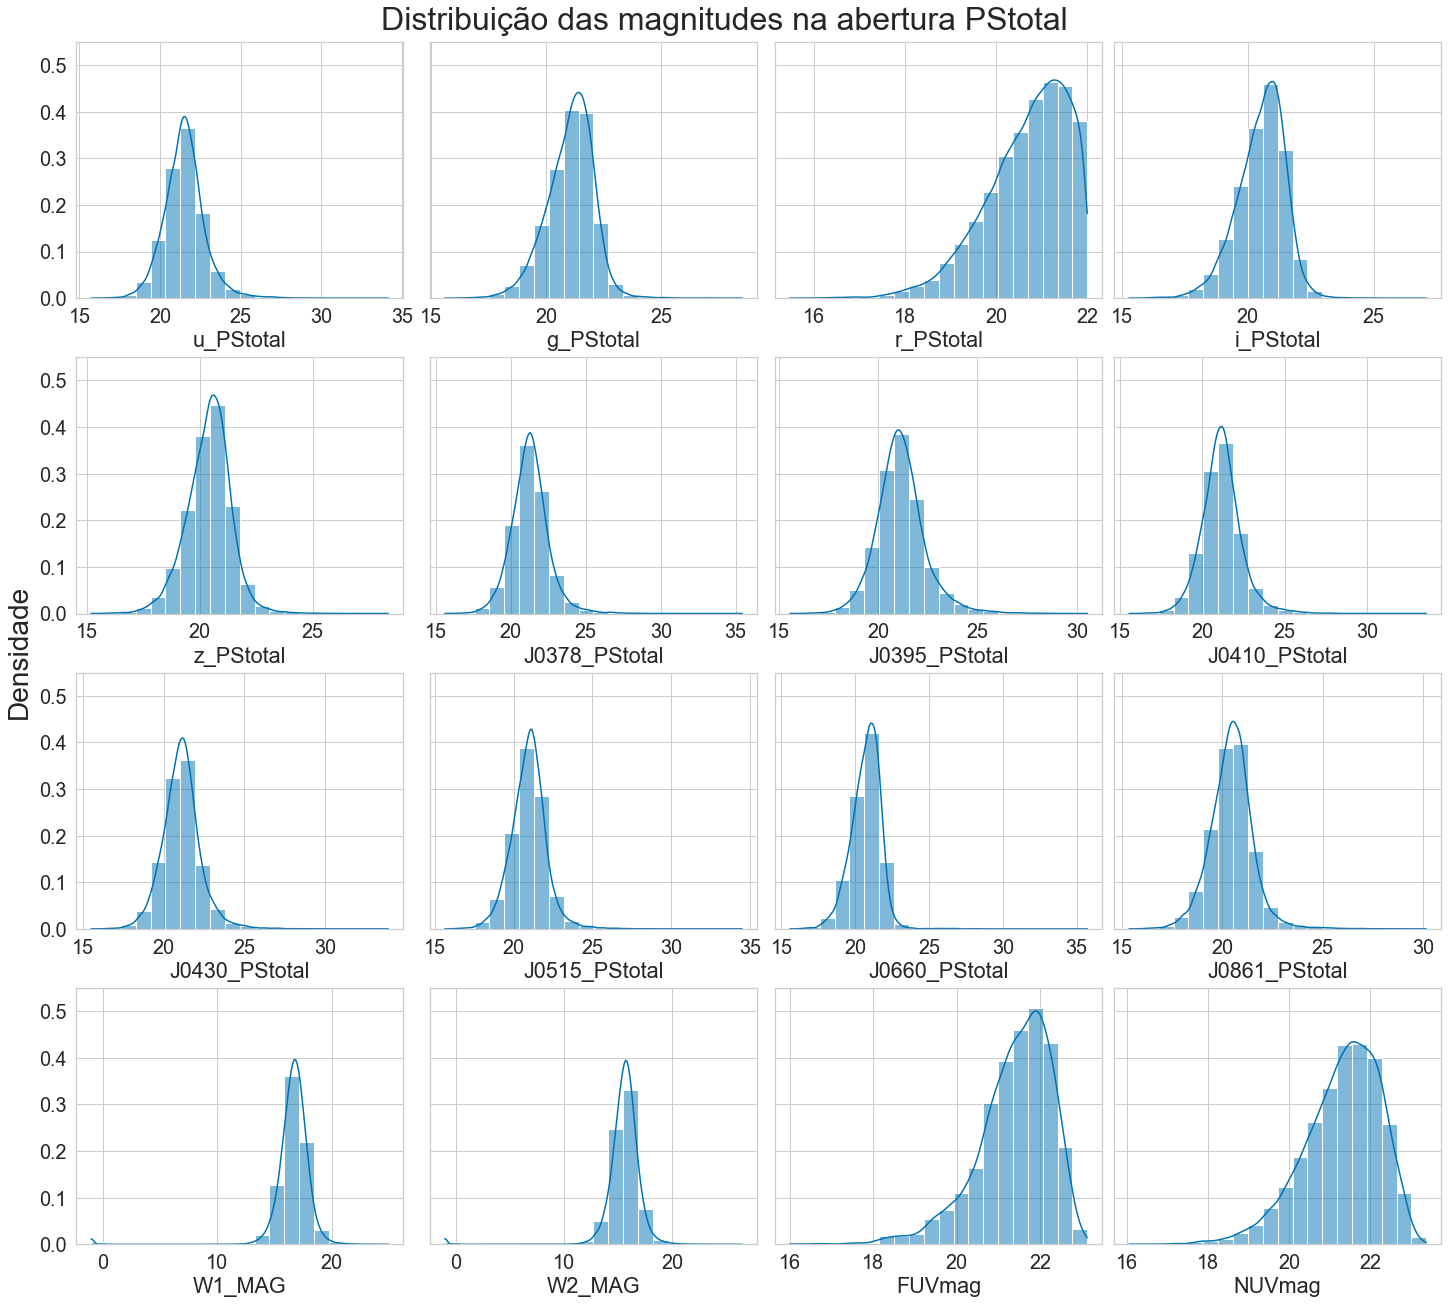

In [115]:
# Histogramas
sns.set(context="notebook", style="whitegrid", palette="dark",font_scale=1.8)

fig, axs = plt.subplots(4, 4, figsize=(20, 18), constrained_layout=True, sharey = True)
dic = {0:axs[0,0], 1:axs[0,1], 2:axs[0,2], 3:axs[0,3],
       4:axs[1,0], 5:axs[1,1], 6:axs[1,2], 7:axs[1,3],
       8:axs[2,0], 9:axs[2,1],10:axs[2,2],11:axs[2,3],
      12:axs[3,0],13:axs[3,1],14:axs[3,2],15:axs[3,3]}

for i in range(16):
    sns.histplot(data=dados2[mags[i]], bins=20, kde=True, stat='density', ax=dic[i], 
                 color='#0072B2').set(ylim=(0, 0.55), ylabel='')
fig.suptitle('Distribuição das magnitudes na abertura PStotal', fontsize=32)
fig.supylabel('Densidade', fontsize=28)
plt.show()

In [116]:
fig.get_figure().savefig("dens_mags.png",  bbox_inches='tight') 

In [64]:
errs = error_splus+error_wise+error_galex
dados2[errs].describe().round(2)

,e_u_PStotal,e_g_PStotal,e_r_PStotal,e_i_PStotal,e_z_PStotal,e_J0378_PStotal,e_J0395_PStotal,e_J0410_PStotal,e_J0430_PStotal,e_J0515_PStotal,e_J0660_PStotal,e_J0861_PStotal,W1_MAG_ERR,W2_MAG_ERR,e_FUVmag,e_NUVmag
count,32687.00,32687.00,32687.00,32687.00,32687.00,32687.00,32687.00,32687.00,32687.00,32687.00,32687.00,32687.00,32439.00,32226.00,3667.00,10197.00
mean,2.98,0.23,0.13,0.16,0.38,5.63,3.28,5.52,4.18,3.50,2.59,0.92,0.16,0.33,0.31,0.26
std,152.52,2.71,0.69,0.60,2.61,541.02,16.97,279.56,228.79,372.87,406.63,11.14,1.73,14.29,0.11,0.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,-1.00,-1.00,0.02,0.01
25%,0.13,0.06,0.05,0.06,0.10,0.17,0.25,0.21,0.18,0.14,0.06,0.13,0.04,0.06,0.23,0.17
50%,0.27,0.12,0.10,0.11,0.18,0.33,0.47,0.40,0.35,0.26,0.11,0.23,0.08,0.12,0.32,0.26
75%,0.55,0.20,0.16,0.18,0.30,0.69,1.08,0.83,0.68,0.46,0.18,0.40,0.15,0.21,0.40,0.36
max,26951.11,449.14,23.04,45.36,331.66,97424.15,1841.39,39212.93,39913.90,67174.87,73495.52,1587.34,171.72,2521.75,0.54,0.50


In [65]:
# Quantil 90%
dados2[errs].quantile(q=0.9).round(2)

e_u_PStotal         1.70
e_g_PStotal         0.31
e_r_PStotal         0.22
e_i_PStotal         0.28
e_z_PStotal         0.49
e_J0378_PStotal     2.36
e_J0395_PStotal    15.21
e_J0410_PStotal     3.37
e_J0430_PStotal     2.03
e_J0515_PStotal     0.91
e_J0660_PStotal     0.28
e_J0861_PStotal     0.73
W1_MAG_ERR          0.27
W2_MAG_ERR          0.39
e_FUVmag            0.46
e_NUVmag            0.43
Name: 0.9, dtype: float64

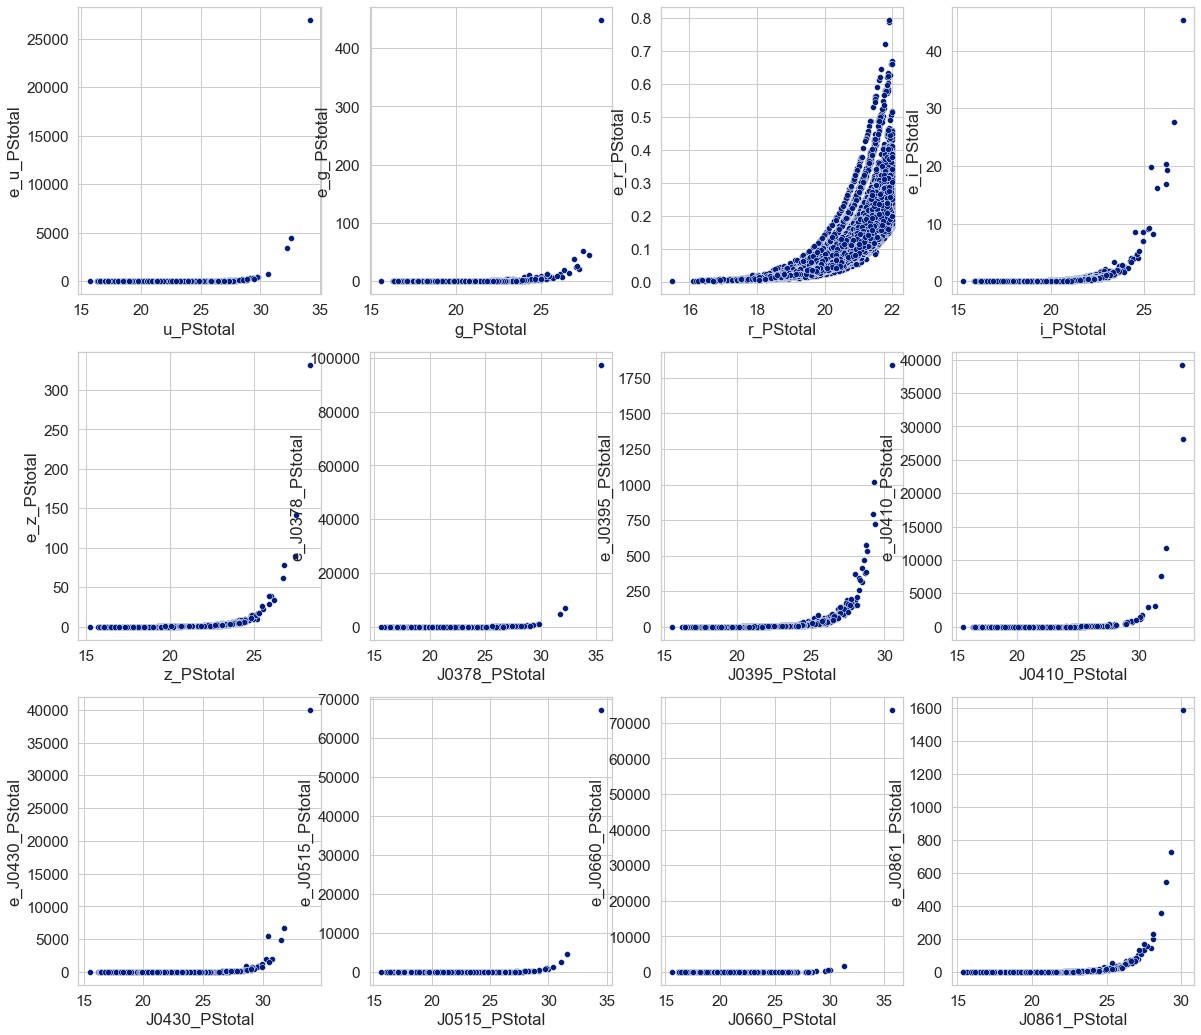

In [71]:
# Relação das magnitudes do S-PLUS com seus respectivos erros
sns.set(context="notebook", style="whitegrid", palette="dark",font_scale=1.4)

fig, axs = plt.subplots(3, 4, figsize=(20, 18))
dic = {0:axs[0,0], 1:axs[0,1], 2:axs[0,2], 3:axs[0,3],
       4:axs[1,0], 5:axs[1,1], 6:axs[1,2], 7:axs[1,3],
       8:axs[2,0], 9:axs[2,1],10:axs[2,2],11:axs[2,3]}

for i in range(12):
    sns.scatterplot(data=dados2, y=error_splus[i], x=splus[i], ax=dic[i])
plt.show()

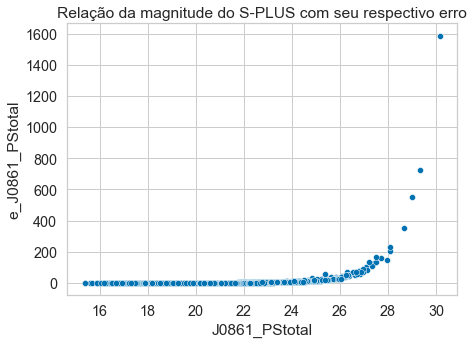

In [171]:
sns.set(context="notebook", style="whitegrid", palette="dark",font_scale=1.3)

fig = plt.figure(figsize=(7,5))
sns.scatterplot(data=dados2, y=error_splus[11], x=splus[11], color='#0072B2')
plt.title('Relação da magnitude do S-PLUS com seu respectivo erro')
plt.show()

In [172]:
fig.get_figure().savefig("disp_err.png",  bbox_inches='tight') 

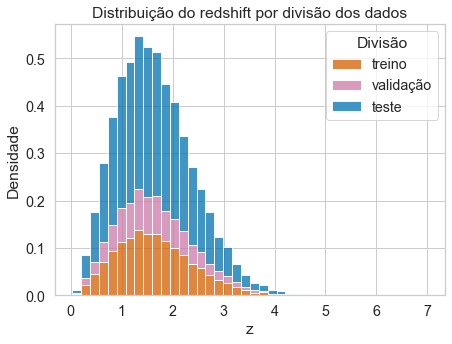

In [152]:
sns.set(context="notebook", style="whitegrid", palette="icefire",font_scale=1.3)

dados_z = pd.DataFrame({'Z':dados2["Z"].values, 
                        'dataset':["train"]*trainf0.shape[0]+["valid"]*validf0.shape[0]+["test"]*teste.shape[0]})
fig = plt.figure(figsize=(7,5))
sns.histplot(dados_z,x="Z", hue="dataset",multiple="stack", bins=40, stat="density", 
             palette=["#0072B2", "#CC79A7", "#D55E00"]).set(ylabel="Densidade")
plt.title('Distribuição do redshift por divisão dos dados')
plt.xlabel('z')
plt.legend(title='Divisão',labels=["treino","validação",'teste']) 
plt.show()

In [153]:
fig.get_figure().savefig("hist_z.png",  bbox_inches='tight') 

C:\Users\Gabriela\AppData\Local\Temp/ipykernel_9428/2446913300.py:20: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([p1,p2],     # The line objects


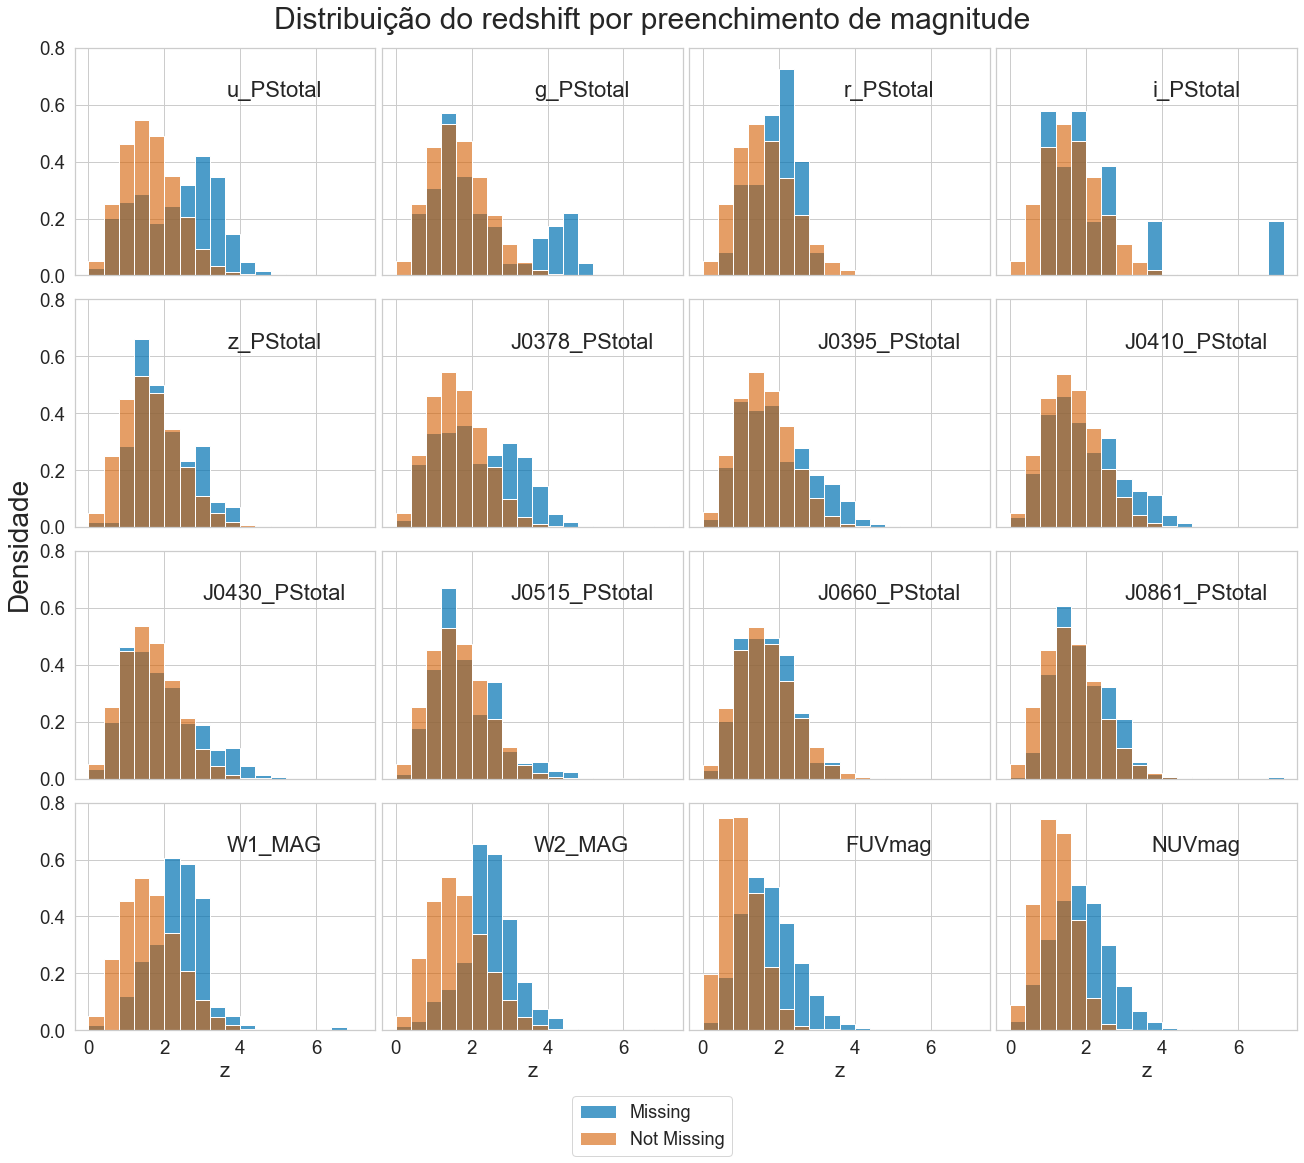

In [149]:
# Redshift vs missing
sns.set(context="notebook", style="whitegrid", palette="dark", font_scale=1.7)

fig, axs = plt.subplots(4, 4, figsize=(18, 15), sharex = True, sharey = True, constrained_layout=True)
dic = {0:axs[0,0], 1:axs[0,1], 2:axs[0,2], 3:axs[0,3],
       4:axs[1,0], 5:axs[1,1], 6:axs[1,2], 7:axs[1,3],
       8:axs[2,0], 9:axs[2,1],10:axs[2,2],11:axs[2,3],
      12:axs[3,0],13:axs[3,1],14:axs[3,2],15:axs[3,3]}
mis = dados2[mags].isnull()

for i in range(16):
    p1=sns.histplot(data=dados2.loc[mis[mags[i]] == True]["Z"],color="#0072B2",
                    binwidth=0.4, bins=20, stat='density', ax=dic[i], alpha=0.7, 
                    binrange=[0,7]).set(ylim=(0, 1.5), ylabel='', xlabel='z')
    p2=sns.histplot(data=dados2.loc[mis[mags[i]] == False]["Z"],color='#D55E00',
                    binwidth=0.4, binrange=[0,7],stat='density', ax=dic[i],
                    alpha=0.6).set(ylim=(0, 0.8), ylabel='', xlabel='z')
    dic[i].text(4.9,0.65, mags[i], ha="center", va="center", fontsize=22)
    
fig.legend([p1,p2],     # The line objects
           labels=["Missing","Not Missing"],   # The labels for each line
           loc="upper center",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           prop={'size': 18}, bbox_to_anchor=(0.5, -0.01))    

fig.suptitle('Distribuição do redshift por preenchimento de magnitude', fontsize=30)
fig.supylabel('Densidade', fontsize=28)
plt.show()

In [150]:
fig.get_figure().savefig("dens_NA.png",  bbox_inches='tight') 

In [157]:
missing_values = (dados2[mags].isnull().sum() / len(dados2[mags]))*100
missing_values.sort_values(inplace=True, ascending=False)
missing_values = missing_values.to_frame()
missing_values.columns = ['% Missing']
missing_values['Contagem'] = dados2[mags].isnull().sum()
missing_values.index.names = ['Magnitude']
missing_values['Magnitude'] = missing_values.index
missing_values

,% Missing,Contagem,Magnitude
Magnitude,,,
FUVmag,88.781473,29020,FUVmag
NUVmag,68.804112,22490,NUVmag
J0395_PStotal,9.116774,2980,J0395_PStotal
J0410_PStotal,6.654021,2175,J0410_PStotal
J0378_PStotal,6.100285,1994,J0378_PStotal
J0430_PStotal,5.353810,1750,J0430_PStotal
u_PStotal,5.246734,1715,u_PStotal
J0515_PStotal,2.282253,746,J0515_PStotal
J0861_PStotal,1.535779,502,J0861_PStotal


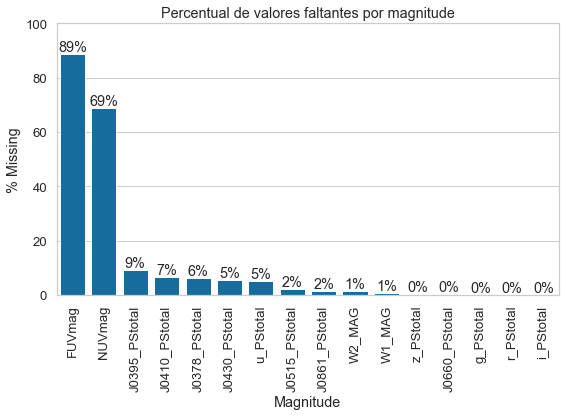

In [160]:
sns.set(context="notebook", style="whitegrid", palette="dark",font_scale=1.2)

fig = plt.figure(figsize=(9,5))

ax = sns.barplot(x = 'Magnitude', y = '% Missing', data=missing_values, color='#0072B2')
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title('Percentual de valores faltantes por magnitude')
plt.show()

In [161]:
fig.get_figure().savefig("histNA.png",  bbox_inches='tight') 

In [56]:
from matplotlib.colors import LinearSegmentedColormap
my_cmap=LinearSegmentedColormap.from_list('rg',["#D55E00","w","#0072B2"], N=256) 

<AxesSubplot:>

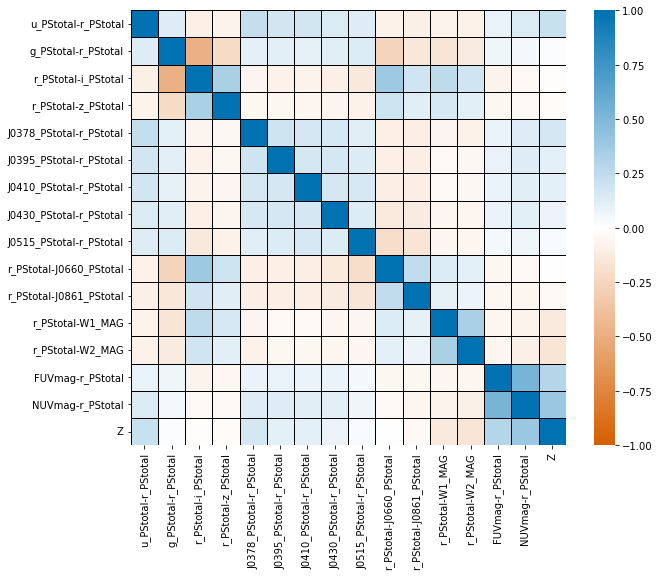

In [75]:
# A correlação diminui quando olhamos as colors em vez das mags
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(dados[colors+["Z"]].corr(),cmap=my_cmap, vmin=-1, vmax=1, linewidths=1, linecolor='black')

In [74]:
fig.get_figure().savefig("corr.png",  bbox_inches='tight') 